In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MultipleLocator
from scipy.io import readsav

from matplotlib import animation, rc
from IPython.display import HTML

import sys
sys.path.append("../")
from iris2gauss import fit2gauss

In [2]:
path = '/Users/WilliamHenryAshfieldIV/dat/iris/'
filename = 'raster_data.sav'
fn = path+filename

In [3]:
ro = readsav(fn,verbose=False,python_dict=False)

In [4]:
tm = np.array(ro.d['TIME'][0])
ro.d['TIME_CCSDS'][0][0]

b'2014-10-25T14:58:28.730'

In [5]:
sttime = 53908 # observation start time in sec.
tm += sttime

In [6]:
import datetime
import matplotlib.dates as date

In [7]:
dts = np.empty(len(tm), dtype = '<U15')
for i in range (0,len(tm)):
    dts[i] = str(datetime.timedelta(seconds=tm[i],milliseconds=3))

In [8]:
dts[0]

'14:58:28.173000'

In [9]:
tmp = np.array([datetime.datetime for x in range(len(tm))])
for i in range(0,len(tm)):
    tmp[i]=datetime.datetime.strptime(dts[i],'%H:%M:%S.%f')
tm_d = date.date2num(tmp)

In [11]:
Int.shape

(387, 2040, 197)

In [10]:
Int = ro.d['INT'][0]
wvl = ro.d['WVL'][0]
err = ro.d['ERR'][0]

data = Int[69,:,:] # raster px=69, the one we want.
error = err[69,:,:]

# trim:
jj = np.where((wvl > 1402) & (wvl < 1405))[0]
data = data[:,jj]
error = error[:,jj]
wvl = wvl[jj]

In [12]:
Int.shape

(387, 2040, 197)

In [13]:
wvl[0]

1402.014467867996

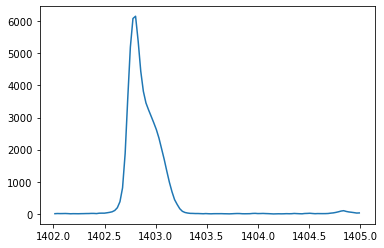

In [14]:
plt.plot(wvl,data[1426,:])

In [80]:
i = 1428
print('time = ',dts[i])

time =  17:06:09.153000


In [81]:
res1 = fit2gauss(wvl,data[i,:],error[i,:],chi_thr=15.,verbose=True)

est params =  [64.50585030289754, 1403.8365096893715, 0.1, 748.466343053005, 1402.8153102155875, 0.1]
single peak found
only one peak still
new init params =  [64.50585030289754, 1403.8365096893715, 0.1, 748.466343053005, 1402.8153102155875, 0.1]
a2g = [1.16359039e+03 1.40290192e+03 9.45284605e-02 1.88395642e+03
 1.40280667e+03 5.53056912e-02]
a1g[0] = 2480.8400908448416
chi2g =  10.104515390890466
a2g =  [1.16359039e+03 1.40290192e+03 9.45284605e-02 1.88395642e+03
 1.40280667e+03 5.53056912e-02]
chi1g =  65.96743833069407
chi2g =  10.104515390890466


vr =  28.21352286411091
vb =  7.841968336491698


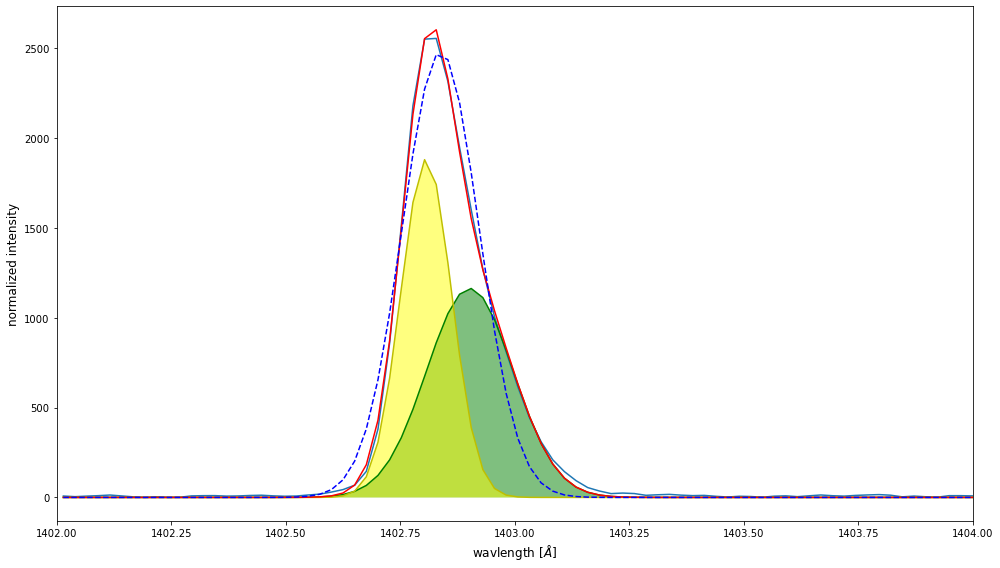

In [82]:
# extract arrays
y2a = res1["y2a"]
y2b = res1["y2b"]
y1g = res1["y1g"]

a2g = res1["a2g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wvl, data[i,:])

# peak 1
ax1.plot(wvl, y2a, "g")
ax1.fill_between(wvl, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wvl, y2b, "y")
ax1.fill_between(wvl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wvl,y2a+y2b, "r")

# single fit
ax1.plot(wvl,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
ax1.set_xlim(1402,1404)
fig.tight_layout()

line = 1402.77
c = 300.
freq = c/line*1e3

if a2g[1] < a2g[4]:
    vb = (a2g[1]-line)/line*3e5 # in km/s
    vr = (a2g[4]-line)/line*3e5
else:
    vr = (a2g[1]-line)/line*3e5 # in km/s
    vb = (a2g[4]-line)/line*3e5
    
print('vr = ',vr)
print('vb = ',vb)

